# Descripcion del problema


Informacion relevante:

   Los datos están relacionados con las campañas de marketing  de una institución bancaria portuguesa.
   Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto para el mismo cliente,
   con el fin de acceder a un credito bancario  y si esta o no interesado 
   
   Informacion sobre el conjunto de datos 
   
   El conjuto de datos original contiene 45.211 registros y 16 atributos + la clase obejetivo con dos categoria si o no,
   Luego de Cargar y dividir los datos los conjuntos de datos quedan asi:
  
    1) trai = 31.647 instancias 16 atributos mas la clase
    2) test = 13.564 instancias 16 atributos mas la 
    3) split-test = 3.164 (10%) del tain . instancias 16 atributos mas la clase

## Preparación de datos
importamos todas las librerías necesarias para trabajar Aprendizaje Automático con Python y Sci-kit learn

In [113]:
%reset


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
import io
import requests
from sklearn.metrics import classification_report, confusion_matrix

##### 1) bank-full.csv contiene (4521) instancias y 17 atributos , ordenados por fecha (desde mayo de 2008 hasta noviembre de 2010).

In [115]:
ds_ = pd.read_csv('bank-full.csv', sep=';', na_values=" ?" )# se carga el cojunto de datos csv
ds = ds_.dropna() # se elimina las filas/columnas con valores null
ds = ds.rename(columns = {ds.columns.values[16]:'C'}) # renombramos la ultima columna por "C" de clase
le = preprocessing.LabelEncoder() # Label encoder de sci-kit
ds = ds.apply(le.fit_transform) # Convertimos los valores de object a numericos
ds.head() # se verifica el resultado de cargue de los datos 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,C
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0


##### Se grafican las clases para observar la proporción entre clases.
Adicionalmente se graficaron todos los atributos para verificar que no hubiese valores atípicos en las columnas 
Nota se omite el resultado de estas graficas porque no encontraron valores atípicos


Clase 0: 39922
Clase 1: 5289
Proporcion: 7.55 : clase[0] / clase[1]


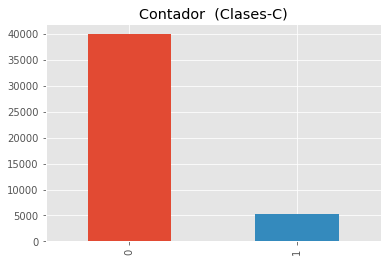

In [116]:
target_count =ds['C'].value_counts() 
print('Clase 0:', target_count[0])
print('Clase 1:', target_count[1])
print('Proporcion:', round(target_count[0] / target_count[1]  , 2), ': clase[0] / clase[1]')
target_count.plot(kind='bar', title='Contador  (Clases-C)');

### Balanceo de clases en conjunto de datos con undersampling

Dado que las clases están desbalanceadas, se procede a hacer el balanceo de clases usando la técnica de undersampling , la cual consiste en iguales la clase mayoritaria al  numero de instacias de la clase minoritaria .
Nota: Inicialmente se realizaron pruebas con las clases desbalanceadas y se observo que la capacidad de generalizacion del  clasificador muy regular en todas las tecnicas de clasificacion esperimentadas los resultados de esta primera iteracion se omitieron para no generar codigo adicional. 

In [117]:
from sklearn.utils import resample
# separar las clases entre mayoritaria y minoritaria 
ds_majority = ds[ds.C ==0]
ds_minorityd = ds[ds.C ==1]

# sobre muestrear las clases minoritarias
ds_majority_downsampled = resample(ds_majority, 
                                 replace=False,     # Muestreo sin remplaso
                                 n_samples=5289,    # cantidad de muestra a igualar
                                 random_state=123) 



# concaternar la clase mayoritaria con la clases minoritarias creadas recientemente
ds_downsampled = pd.concat([ds_majority_downsampled,ds_minorityd ])
 
# imprimir el numero de muestras por clase
ds_downsampled.C.value_counts()


1    5289
0    5289
Name: C, dtype: int64

## Dividir el conjunto de datos 
Dividir aleatoriamente el conjunto de datos cargado y normalizado en anterior paso en "ds"  70% para train y 30% para test,
adicionalmente se extraera 10% de los datos de train para crear el conjunto de validadcion 

In [118]:
ds=ds_downsampled
import numpy as np
from sklearn.model_selection import train_test_split
x=ds.drop('C', axis = 1)
y=ds['C']
from collections import Counter
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)
x_strainval, x_stestval, y_strainval,y_stestval = train_test_split(x_train,y_train, test_size = 0.1, random_state=1)
print('Conteo de clases conjunto train {}'.format(Counter(y_train)))
print('Conteo de Clases conjunto test  {}'.format(Counter(y_test)))
print('Conteo de Clases conjunto train Validacion  {}'.format(Counter( y_strainval)))
print('Conteo de Clases conjunto test Validacion   {}'.format(Counter( y_stestval)))


Conteo de clases conjunto train Counter({1: 3721, 0: 3683})
Conteo de Clases conjunto test  Counter({0: 1606, 1: 1568})
Conteo de Clases conjunto train Validacion  Counter({0: 3333, 1: 3330})
Conteo de Clases conjunto test Validacion   Counter({1: 391, 0: 350})


In [119]:
#se crean dos dataframe df=train dt=test
df=pd.DataFrame(x_train)
df['C']=y_train
dt=pd.DataFrame(x_test)
dt['C']=y_test


Se verifica nuevamente la distribucion de las clases luego de undersampling. 

Clase 0: 5289
Clase 1: 5289
Proporcion: 1.0 : clase[0] / clase[1]


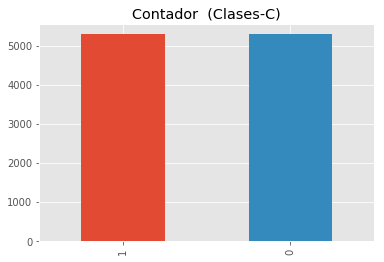

In [64]:
target_count =ds['C'].value_counts() 
print('Clase 0:', target_count[0])
print('Clase 1:', target_count[1])
print('Proporcion:', round(target_count[0] / target_count[1]  , 2), ': clase[0] / clase[1]')
target_count.plot(kind='bar', title='Contador  (Clases-C)');

Se realiza una matriz de correlacion para observar datos con alta correlacion. por ahora no se toman decisiones al respecto.

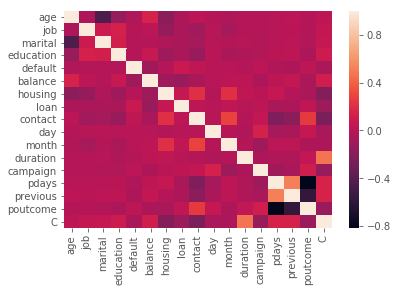

In [65]:
import seaborn as sns 
corr = ds.corr() 
sns.heatmap(corr, 
      xticklabels=corr.columns.values, 
      yticklabels=corr.columns.values) 

se puede observa que existe una alta  correlacion evidente entre los atributos "pdays, previous", aunque por ahora 
no se tomara deciciones al respecto hasta no realizar las primeros experimento  con los modelos.

# Tecnica de Clasificacion # 1 (SVM)

Se realizaran algunas pruebas para estimar cuales parametros permiten el mejor desempeño de la SVM, debido al alto costo 
computacional la evaluacion de dichos parametros se ralizara con conjunto de validacion .



### Estimacion del mejor C para la SVM.

In [13]:
########################################################################
#################### Linear SVM C=10.0 ##################################


SVM10 = svm.LinearSVC(dual=False, C=1)
SVM10.fit(x_strainval, y_strainval)

SVM10_predict = SVM10.predict(x_stestval)

print("\n############## Accuracy Linear SVM C=10.0 ##################")
print(metrics.accuracy_score(y_stestval, SVM10_predict))
print(metrics.confusion_matrix(y_stestval, SVM10_predict))

########################################################################
#################### Linear SVM C=50.0 ##################################

SVM50 = svm.LinearSVC(dual=False, C=50.0)
SVM50.fit(x_strainval, y_strainval)

SVM50_predict = SVM50.predict(x_stestval)

print("\n############## Accuracy Linear SVM C=50.0 ##################")
print(metrics.accuracy_score(y_stestval, SVM50_predict))
print(metrics.confusion_matrix(y_stestval, SVM50_predict))

########################################################################
#################### Linear SVM C=500.0 ##################################

SVM50 = svm.LinearSVC(dual=False, C=500.0)
SVM50.fit(x_strainval, y_strainval)

SVM50_predict = SVM50.predict(x_stestval)

print("\n############## Accuracy Linear SVM C=500.0 ##################")
print(metrics.accuracy_score(y_stestval, SVM50_predict))
print(metrics.confusion_matrix(y_stestval, SVM50_predict))



############## Accuracy Linear SVM C=10.0 ##################
0.8137651821862348
[[286  64]
 [ 74 317]]

############## Accuracy Linear SVM C=50.0 ##################
0.8124156545209177
[[285  65]
 [ 74 317]]

############## Accuracy Linear SVM C=500.0 ##################
0.8124156545209177
[[285  65]
 [ 74 317]]


### Evaluacion de mejor kernel (rbf, sigmoid)

Como se puede observar no es posible establecer un mejor C pues todos tiene comportamietos similares 

 

### ******Iteracion 1.1 SVM Lineal********
##### Se realiza la iteracion de SVM Lineal con los datos de train y test originales 45211 instacias 17atributos ,

Conjunto de Datos  

train = (31647 instacias y 17 atributos),
test  = (13.564 instancias y 16 atributos sin la Clase)

Dado que el mejor desempeño lo obtuvo el kernel Lineal en adelante se utilizara este.

In [90]:
########################################################################
#################### Linear SVM FINAL ##################################
x_train =df.drop('C', axis = 1)
y_train = df['C']
x_test =dt.drop('C', axis = 1)
y_test = dt['C']
SVM = svm.LinearSVC(dual=False, C=1)
SVM.fit(x_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix
SVM_predict = SVM.predict(x_test)

print("\n############## Accuracy Linear SVM FINAL ##################")
print(metrics.accuracy_score(y_test, SVM_predict))
print(metrics.confusion_matrix(y_test, SVM_predict))
print(classification_report(y_test,SVM_predict))



############## Accuracy Linear SVM FINAL ##################
0.8015122873345936
[[1314  292]
 [ 338 1230]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1606
           1       0.81      0.78      0.80      1568

   micro avg       0.80      0.80      0.80      3174
   macro avg       0.80      0.80      0.80      3174
weighted avg       0.80      0.80      0.80      3174



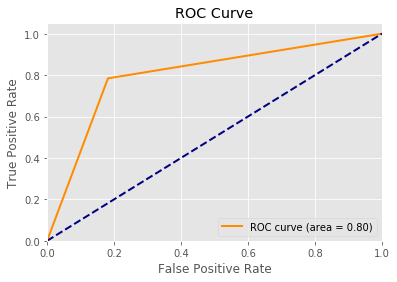

In [91]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

fpr, tpr, _ = roc_curve(y_test, SVM_predict)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


Se realizaron pruebas eliminando las variables que tenían alta correlación pero pese a esto los clasificadores en general no mejoraron las métricas.  También se identificó que el atributo que realmente afecta la clasificación  es atributo “duration”,  por tal razón se omite la eliminación de atributos como alternativa para mejorar la capacidad de los clasificadores. 

In [120]:
#%reset
del df['duration']
#del df['previous']
#del dt['contact']
del dt['duration']

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,C
33596,9,0,1,0,0,1311,1,0,0,19,0,1,0,0,3,0
44792,22,2,1,2,0,4265,0,0,0,14,11,2,0,0,3,1
31235,16,1,2,1,0,1131,0,0,0,2,7,2,0,0,3,1
1863,15,1,0,0,0,1306,1,0,2,8,8,1,0,0,3,1
20316,13,4,1,1,0,916,0,0,0,10,1,0,0,0,3,1


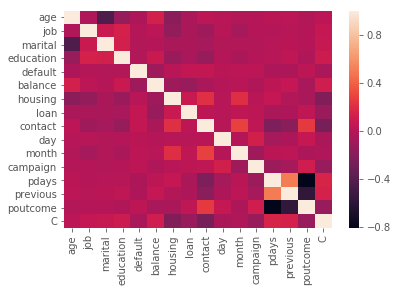

In [121]:
import seaborn as sns 
corr = df.corr() 
sns.heatmap(corr, 
      xticklabels=corr.columns.values, 
      yticklabels=corr.columns.values) 

### ******Iteracion 1.1 SVM Lineal********

Conjunto de Datos 45211 instacias 15 atributos

train = (31647 instacias y 15 atributos),
test  = (13.564 instancias y 14 atributos sin la Clase)



In [122]:
########################################################################
#################### Linear SVM FINAL ##################################
xntrain =df.drop('C', axis = 1)
yntrain = df['C']
xntest =dt.drop('C', axis = 1)
yntest = dt['C']

SVM = svm.LinearSVC(dual=False, C=10.0)
SVM.fit(xntrain, yntrain)

from sklearn.metrics import classification_report, confusion_matrix
SVM_predict = SVM.predict(xntest)

print("\n############## Accuracy Linear SVM FINAL ##################")
print(metrics.accuracy_score(yntest, SVM_predict))
print(metrics.confusion_matrix(yntest, SVM_predict))
print(classification_report(yntest,SVM_predict))



############## Accuracy Linear SVM FINAL ##################
0.6414618777567738
[[ 928  678]
 [ 460 1108]]
              precision    recall  f1-score   support

           0       0.67      0.58      0.62      1606
           1       0.62      0.71      0.66      1568

   micro avg       0.64      0.64      0.64      3174
   macro avg       0.64      0.64      0.64      3174
weighted avg       0.64      0.64      0.64      3174



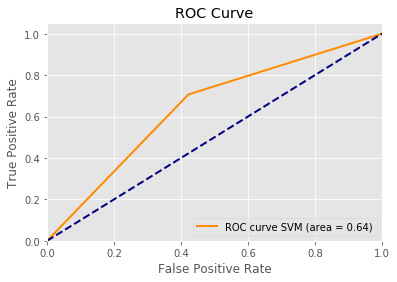

In [123]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

fpr, tpr, _ = roc_curve(yntest, SVM_predict)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve SVM (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

##### como se puede observar el accuracy y la precision mejor en comparacion a las anteriores realizadas por tal razon los siguientes experimentos se realizaran con el conjunto de datos modificado sin la dos columnas padys y poutcome

# Tecnica de Clasificacion # 2 (K-Vecinos mas cercanos)


### ******Iteracion 2 K-NN********

Dado que la eliminacion de los datos con alta correlacion mejoro la clasificacion en SVM en adelante,
se utilizara este mismo conjunto de datos. 


Conjunto de Datos 45211 instacias 15 atributos

train = (31647 instacias y 15 atributos),
test  = (13.564 instancias y 14 atributos sin la Clase)

In [124]:
################################################################
##################  K-Vecinos más cercanos #####################
################################################################
xntrain =df.drop('C', axis = 1)
yntrain = df['C']
xntest =dt.drop('C', axis = 1)
yntest = dt['C']
n_neighbors = 17
KNN = KNeighborsClassifier(n_neighbors)
KNN.fit(xntrain, yntrain)
KNN_predict = KNN.predict(xntest)

print("\n############## Accuracy KNN ##################")
print(metrics.accuracy_score(yntest, KNN_predict))
print(metrics.confusion_matrix(yntest, KNN_predict))
print(classification_report(yntest,KNN_predict))
xntest.head()


############## Accuracy KNN ##################
0.5982986767485823
[[1074  532]
 [ 743  825]]
              precision    recall  f1-score   support

           0       0.59      0.67      0.63      1606
           1       0.61      0.53      0.56      1568

   micro avg       0.60      0.60      0.60      3174
   macro avg       0.60      0.60      0.60      3174
weighted avg       0.60      0.60      0.60      3174



,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
36300,10,2,1,2,0,4590,0,1,0,10,8,1,0,0,3
28914,18,1,1,1,0,1853,1,0,1,1,3,3,0,0,3
42698,9,8,2,1,0,3133,0,0,0,17,4,0,0,0,3
28689,42,9,1,2,0,845,1,1,0,29,4,0,0,0,3
44742,46,11,1,3,0,3634,0,0,1,8,11,3,0,0,3


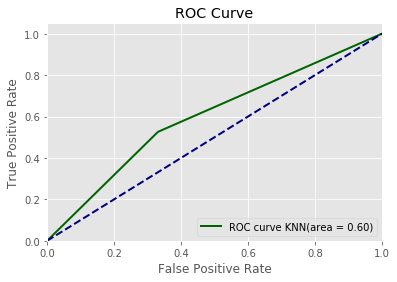

In [125]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

fpr, tpr, _ = roc_curve(yntest, KNN_predict)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkgreen',
         lw=2, label='ROC curve KNN(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Tecnica de Clasificacion # 3 (Redes neuronales MLP)

##### Se probaran diferentes opciones de arquitectura el evaluar la mejor configuracion del MLP

In [110]:
#### ensayar diferentes opciones de arquitectura y estimar la tasa de aprendizaje

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  

clf = MLPClassifier(hidden_layer_sizes=(13, 13, 13, 13, 13, 13), 
                    random_state=42, learning_rate_init=0.0016)
clf.fit(x_strainval, y_strainval)

clf_predict = clf.predict(x_stestval)

print("\n############## Accuracy MLP ##################")
print(metrics.accuracy_score(y_stestval, clf_predict))
print(metrics.confusion_matrix(y_stestval, clf_predict))
print(classification_report(y_test, clf_predict))
##########################################################################

clf2 = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10), 
                    random_state=42, learning_rate_init=0.001)
clf2.fit(x_strainval, y_strainval)

clf2_predict = clf2.predict(x_stestval)

print("\n############## Accuracy MLP ##################")
print(metrics.accuracy_score(y_stestval, clf2_predict))
print(metrics.confusion_matrix(y_stestval, clf2_predict))
print(classification_report(y_stestval, clf2_predict))
sns.heatmap(metrics.confusion_matrix(y_stestval, clf2_predict), center=True)
plt.show()


############## Accuracy MLP ##################
0.786774628879892
[[256  94]
 [ 64 327]]


ValueError: Found input variables with inconsistent numbers of samples: [3174, 741]

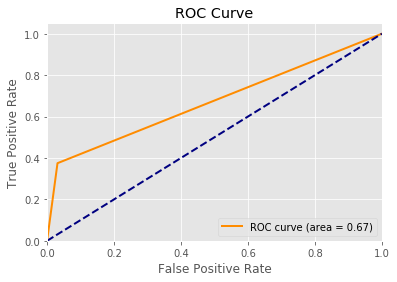

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


fpr, tpr, _ = roc_curve(y_stestval, clf_predict)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### ******Iteracion 3.1 Redes Neuronales MLP********


Conjunto de Datos 45211 instacias 15 atributos

train = (31647 instacias y 15 atributos),
test  = (13.564 instancias y 14 atributos sin la Clase)

In [127]:
xntrain =df.drop('C', axis = 1)
yntrain = df['C']
xntest =dt.drop('C', axis = 1)
yntest = dt['C']

from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(hidden_layer_sizes=(16,16,16,16,16,16,16,16), activation='relu',
                    random_state=42, learning_rate_init=0.0016)

clf.fit(xntrain, yntrain)

clf_predict2 = clf.predict(xntest)

print("\n############## Accuracy MLP ##################")
print(metrics.accuracy_score(yntest, clf_predict2))
print(metrics.confusion_matrix(yntest, clf_predict2))
print(classification_report(yntest, clf_predict2))



############## Accuracy MLP ##################
0.6212980466288595
[[981 625]
 [577 991]]
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      1606
           1       0.61      0.63      0.62      1568

   micro avg       0.62      0.62      0.62      3174
   macro avg       0.62      0.62      0.62      3174
weighted avg       0.62      0.62      0.62      3174



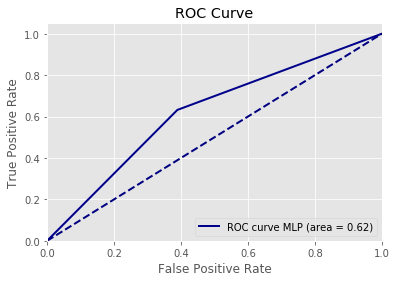

In [128]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

fpr, tpr, _ = roc_curve(yntest, clf_predict2)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkblue',
         lw=2, label='ROC curve MLP (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [204]:
xntrain.head()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous
6149,14,1,1,1,678,1,0,2,26,8,427,0,0
12403,16,0,1,0,448,1,1,2,26,6,111,3,0
21645,14,9,1,0,1182,1,0,0,18,1,168,1,0
29580,18,1,1,1,929,0,1,0,2,3,150,3,0
31245,5,8,1,0,1402,0,0,0,2,7,87,0,0


# Tecnica de Clasificacion # 4 (Arboles de Decision)

Conjunto de Datos 45211 instacias 15 atributos

train = (31647 instacias y 15 atributos), test = (13.564 instancias y 14 atributos sin la Clase)

In [129]:
################################################################
#################### ÁRBOL DE DECISIÓN #########################
################################################################
xntrain =df.drop('C', axis = 1)
yntrain = df['C']
xntest =dt.drop('C', axis = 1)
yntest = dt['C']

DT_clf = tree.DecisionTreeClassifier()
DT_clf.fit(xntrain, yntrain)




DT_predict = DT_clf.predict(xntest)

print("\n############## Accuracy DT##################")
print(metrics.accuracy_score(yntest, DT_predict))
print("\n############## Matriz de Confusion DT ##################")
print(metrics.confusion_matrix(yntest, DT_predict))  
print("\n############## Metricas DT ##################")
print(metrics.classification_report(yntest, DT_predict)) 



############## Accuracy DT##################
0.62822936357908

############## Matriz de Confusion DT ##################
[[996 610]
 [570 998]]

############## Metricas DT ##################
              precision    recall  f1-score   support

           0       0.64      0.62      0.63      1606
           1       0.62      0.64      0.63      1568

   micro avg       0.63      0.63      0.63      3174
   macro avg       0.63      0.63      0.63      3174
weighted avg       0.63      0.63      0.63      3174



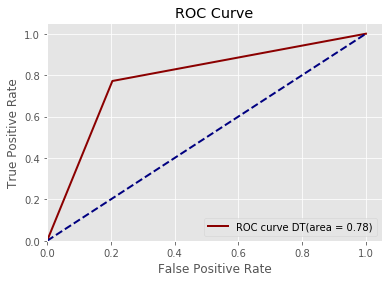

In [108]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

fpr, tpr, _ = roc_curve(yntest, DT_predict)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkred',
         lw=2, label='ROC curve DT(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

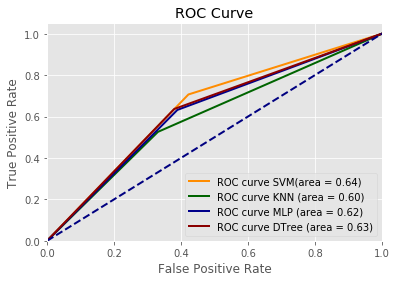

In [130]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

fpr, tpr, _ = roc_curve(yntest, SVM_predict)
roc_auc = auc(fpr, tpr)
fpr1, tpr1, _ = roc_curve(yntest, KNN_predict)
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, _ = roc_curve(yntest, clf_predict2)
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, _ = roc_curve(yntest, DT_predict)
roc_auc3 = auc(fpr3, tpr3)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve SVM(area = %0.2f)' % roc_auc)
plt.plot(fpr1, tpr1, color='darkgreen',
         lw=2, label='ROC curve KNN (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='darkblue',
         lw=2, label='ROC curve MLP (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='darkred',
         lw=2, label='ROC curve DTree (area = %0.2f)' % roc_auc3)


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()